In [1]:
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# split function for training and testing data
from sklearn.model_selection import train_test_split

import pandas as pd

# Image handler lib 
from PIL import Image

batch_size = 128
num_classes = 19
epochs = 1000

# input image dimensions
img_rows, img_cols = 32, 32

# data multi
multiply_data = 100

/home/ulphidius/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ulphidius/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ulphidius/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ulphidius/.local/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [2]:
images_folder_name = 'pokemon_so_deep/result/'

In [3]:
# Read CSV labels
labels = pd.read_csv('pokemon_so_deep/pokemon.csv', delimiter = ';')
labels

,name,type_1,type_2,sprite
0,Bulbasaur,Grass,Poison,001.png
1,Ivysaur,Grass,Poison,002.png
2,Venusaur,Grass,Poison,003.png
3,Charmander,Fire,NaN,004.png
4,Charmeleon,Fire,NaN,005.png
...,...,...,...,...
885,Drakloak,Dragon,Ghost,886.png
886,Dragapult,Dragon,Ghost,887.png
887,Zacian,Fairy,Steel,888.png
888,Zamazenta,Fighting,Steel,889.png


In [4]:
pokemon_types = labels[['type_1', 'type_2']]
pokemon_types

,type_1,type_2
0,Grass,Poison
1,Grass,Poison
2,Grass,Poison
3,Fire,NaN
4,Fire,NaN
...,...,...
885,Dragon,Ghost
886,Dragon,Ghost
887,Fairy,Steel
888,Fighting,Steel


In [5]:
# Create input data
list_of_images = []

for label_sprite in labels['sprite'] :
    file = Image.open(images_folder_name + label_sprite)

    # Virer alpha
    file = file.convert('RGB')
    data = np.array( file, dtype='uint8' )
    
    list_of_images.append(data)

list_of_images *= multiply_data
list_of_images = np.array(list_of_images)

In [6]:
# input dico for all types (dataframe)
pokemon_types_number_dic = {
    'Bug' : 0,
    'Dark' : 1,
    'Dragon' : 2,
    'Electric' : 3,
    'Fairy' : 4,
    'Fighting' : 5,
    'Fire' : 6,
    'Flying' : 7,
    'Ghost' : 8,
    'Grass' : 9,
    'Ground' : 10,
    'Ice' : 11,
    'Normal' : 12,
    'Poison' : 13,
    'Psychic' : 14,
    'Rock' : 15,
    'Steel' : 16,
    'Water' : 17,
    18 : 18
}

pokemon_types.fillna(18, inplace = True)

pokemon_types['type_1'] = pokemon_types.type_1.apply(lambda x: pokemon_types_number_dic[x])
pokemon_types['type_2'] = pokemon_types.type_2.apply(lambda x: pokemon_types_number_dic[x])

pokemon_types

/home/ulphidius/.local/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/home/ulphidius/miniconda3/envs/machine_learning/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ulphidius/miniconda3/envs/machine_learning/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,type_1,type_2
0,9,13
1,9,13
2,9,13
3,6,18
4,6,18
...,...,...
885,2,8
886,2,8
887,4,16
888,5,16


In [7]:
# Create output data
output_array = []
for index, pokemon_type in pokemon_types.iterrows() :
    type_array = np.zeros(19)
    type_array[pokemon_type['type_1']] = 1
     # type_array[pokemon_type['type_2']] = 1
    output_array.append(type_array)

output_array *= multiply_data
output_array = np.array(output_array)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(list_of_images, output_array, test_size = 0.20, random_state=42)

In [9]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (71200, 32, 32, 3)
71200 train samples
17800 test samples


In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
# look a 2 dimention
model.add(MaxPooling2D(pool_size=(2, 2)))
# option for forget 25% of result
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(clipvalue=0.5, learning_rate=0.0001),
              metrics=['accuracy'])

train_fit_data = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 71200 samples, validate on 17800 samples
Epoch 1/1000
71200/71200 [==============================] - 96s 1ms/sample - loss: 2.9511 - acc: 0.0660 - val_loss: 2.8926 - val_acc: 0.0936
Epoch 2/1000
71200/71200 [==============================] - 96s 1ms/sample - loss: 2.9043 - acc: 0.0833 - val_loss: 2.8520 - val_acc: 0.1464
Epoch 3/1000
71200/71200 [==============================] - 96s 1ms/sample - loss: 2.8692 - acc: 0.1028 - val_loss: 2.8235 - val_acc: 0.1440
Epoch 4/1000
71200/71200 [==============================] - 96s 1ms/sample - loss: 2.8461 - acc: 0.1134 - val_loss: 2.8030 - val_acc: 0.1431
Epoch 5/1000
71200/71200 [==============================] - 96s 1ms/sample - loss: 2.8307 - acc: 0.1202 - val_loss: 2.7885 - val_acc: 0.1440
Epoch 6/1000
71200/71200 [==============================] - 96s 1ms/sample - loss: 2.8194 - acc: 0.1213 - val_loss: 2.7780 - val_acc: 0.1440
Epoch 7/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.8109 - acc: 0.1254 

71200/71200 [==============================] - 92s 1ms/sample - loss: 2.7145 - acc: 0.1548 - val_loss: 2.6709 - val_acc: 0.2079
Epoch 116/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.7156 - acc: 0.1558 - val_loss: 2.6700 - val_acc: 0.2079
Epoch 117/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.7138 - acc: 0.1544 - val_loss: 2.6691 - val_acc: 0.2067
Epoch 118/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.7139 - acc: 0.1560 - val_loss: 2.6682 - val_acc: 0.2092
Epoch 119/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.7138 - acc: 0.1576 - val_loss: 2.6673 - val_acc: 0.2092
Epoch 120/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.7126 - acc: 0.1550 - val_loss: 2.6663 - val_acc: 0.2092
Epoch 121/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.7109 - acc: 0.1563 - val_loss: 2.6654 - val_acc: 0.2092
Epoch 122/1000

71200/71200 [==============================] - 92s 1ms/sample - loss: 2.5881 - acc: 0.2162 - val_loss: 2.5278 - val_acc: 0.2644
Epoch 230/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.5858 - acc: 0.2191 - val_loss: 2.5261 - val_acc: 0.2645
Epoch 231/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.5856 - acc: 0.2170 - val_loss: 2.5245 - val_acc: 0.2666
Epoch 232/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.5843 - acc: 0.2187 - val_loss: 2.5229 - val_acc: 0.2666
Epoch 233/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.5813 - acc: 0.2211 - val_loss: 2.5213 - val_acc: 0.2675
Epoch 234/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.5814 - acc: 0.2190 - val_loss: 2.5197 - val_acc: 0.2691
Epoch 235/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.5791 - acc: 0.2218 - val_loss: 2.5180 - val_acc: 0.2691
Epoch 236/1000

71200/71200 [==============================] - 92s 1ms/sample - loss: 2.4169 - acc: 0.2805 - val_loss: 2.3376 - val_acc: 0.3310
Epoch 344/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.4160 - acc: 0.2803 - val_loss: 2.3359 - val_acc: 0.3325
Epoch 345/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.4154 - acc: 0.2813 - val_loss: 2.3343 - val_acc: 0.3325
Epoch 346/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.4130 - acc: 0.2826 - val_loss: 2.3325 - val_acc: 0.3334
Epoch 347/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.4111 - acc: 0.2823 - val_loss: 2.3307 - val_acc: 0.3334
Epoch 348/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.4131 - acc: 0.2792 - val_loss: 2.3291 - val_acc: 0.3346
Epoch 349/1000
71200/71200 [==============================] - 92s 1ms/sample - loss: 2.4057 - acc: 0.2833 - val_loss: 2.3273 - val_acc: 0.3351
Epoch 350/1000

71200/71200 [==============================] - 97s 1ms/sample - loss: 2.2412 - acc: 0.3369 - val_loss: 2.1367 - val_acc: 0.3838
Epoch 458/1000
71200/71200 [==============================] - 99s 1ms/sample - loss: 2.2410 - acc: 0.3347 - val_loss: 2.1350 - val_acc: 0.3838
Epoch 459/1000
71200/71200 [==============================] - 99s 1ms/sample - loss: 2.2370 - acc: 0.3377 - val_loss: 2.1332 - val_acc: 0.3853
Epoch 460/1000
71200/71200 [==============================] - 97s 1ms/sample - loss: 2.2357 - acc: 0.3393 - val_loss: 2.1314 - val_acc: 0.3853
Epoch 461/1000
71200/71200 [==============================] - 97s 1ms/sample - loss: 2.2338 - acc: 0.3388 - val_loss: 2.1295 - val_acc: 0.3853
Epoch 462/1000
71200/71200 [==============================] - 97s 1ms/sample - loss: 2.2324 - acc: 0.3386 - val_loss: 2.1278 - val_acc: 0.3865
Epoch 463/1000
71200/71200 [==============================] - 97s 1ms/sample - loss: 2.2336 - acc: 0.3398 - val_loss: 2.1260 - val_acc: 0.3865
Epoch 464/1000

71200/71200 [==============================] - 97s 1ms/sample - loss: 2.0513 - acc: 0.4001 - val_loss: 1.9207 - val_acc: 0.4713
Epoch 572/1000
71200/71200 [==============================] - 95s 1ms/sample - loss: 2.0532 - acc: 0.3964 - val_loss: 1.9189 - val_acc: 0.4713
Epoch 573/1000
71200/71200 [==============================] - 96s 1ms/sample - loss: 2.0518 - acc: 0.3981 - val_loss: 1.9170 - val_acc: 0.4713
Epoch 574/1000
71200/71200 [==============================] - 95s 1ms/sample - loss: 2.0492 - acc: 0.3984 - val_loss: 1.9151 - val_acc: 0.4729
Epoch 575/1000
71200/71200 [==============================] - 95s 1ms/sample - loss: 2.0438 - acc: 0.4015 - val_loss: 1.9130 - val_acc: 0.4729
Epoch 576/1000
71200/71200 [==============================] - 95s 1ms/sample - loss: 2.0434 - acc: 0.4007 - val_loss: 1.9110 - val_acc: 0.4729
Epoch 577/1000
71200/71200 [==============================] - 95s 1ms/sample - loss: 2.0434 - acc: 0.4026 - val_loss: 1.9091 - val_acc: 0.4737
Epoch 578/1000

71200/71200 [==============================] - 98s 1ms/sample - loss: 1.8557 - acc: 0.4652 - val_loss: 1.6925 - val_acc: 0.5562
Epoch 686/1000
71200/71200 [==============================] - 98s 1ms/sample - loss: 1.8545 - acc: 0.4648 - val_loss: 1.6903 - val_acc: 0.5600
Epoch 687/1000
71200/71200 [==============================] - 98s 1ms/sample - loss: 1.8519 - acc: 0.4652 - val_loss: 1.6883 - val_acc: 0.5600
Epoch 688/1000
71200/71200 [==============================] - 96s 1ms/sample - loss: 1.8479 - acc: 0.4674 - val_loss: 1.6861 - val_acc: 0.5608
Epoch 689/1000
71200/71200 [==============================] - 97s 1ms/sample - loss: 1.8493 - acc: 0.4670 - val_loss: 1.6842 - val_acc: 0.5614
Epoch 690/1000
71200/71200 [==============================] - 99s 1ms/sample - loss: 1.8466 - acc: 0.4670 - val_loss: 1.6821 - val_acc: 0.5641
Epoch 691/1000
71200/71200 [==============================] - 97s 1ms/sample - loss: 1.8439 - acc: 0.4700 - val_loss: 1.6800 - val_acc: 0.5629
Epoch 692/1000

71200/71200 [==============================] - 99s 1ms/sample - loss: 1.6539 - acc: 0.5310 - val_loss: 1.4592 - val_acc: 0.6516
Epoch 800/1000
71200/71200 [==============================] - 97s 1ms/sample - loss: 1.6543 - acc: 0.5310 - val_loss: 1.4573 - val_acc: 0.6516
Epoch 801/1000
71200/71200 [==============================] - 96s 1ms/sample - loss: 1.6505 - acc: 0.5308 - val_loss: 1.4553 - val_acc: 0.6516
Epoch 802/1000
71200/71200 [==============================] - 96s 1ms/sample - loss: 1.6475 - acc: 0.5341 - val_loss: 1.4531 - val_acc: 0.6516
Epoch 803/1000
71200/71200 [==============================] - 96s 1ms/sample - loss: 1.6496 - acc: 0.5296 - val_loss: 1.4511 - val_acc: 0.6516
Epoch 804/1000
71200/71200 [==============================] - 96s 1ms/sample - loss: 1.6446 - acc: 0.5345 - val_loss: 1.4491 - val_acc: 0.6516
Epoch 805/1000
71200/71200 [==============================] - 96s 1ms/sample - loss: 1.6478 - acc: 0.5324 - val_loss: 1.4471 - val_acc: 0.6516
Epoch 806/1000

71200/71200 [==============================] - 93s 1ms/sample - loss: 1.4613 - acc: 0.5940 - val_loss: 1.2333 - val_acc: 0.7308
Epoch 914/1000
71200/71200 [==============================] - 93s 1ms/sample - loss: 1.4596 - acc: 0.5969 - val_loss: 1.2315 - val_acc: 0.7317
Epoch 915/1000
71200/71200 [==============================] - 93s 1ms/sample - loss: 1.4537 - acc: 0.5964 - val_loss: 1.2295 - val_acc: 0.7317
Epoch 916/1000
71200/71200 [==============================] - 93s 1ms/sample - loss: 1.4532 - acc: 0.5958 - val_loss: 1.2275 - val_acc: 0.7329
Epoch 917/1000
71200/71200 [==============================] - 93s 1ms/sample - loss: 1.4523 - acc: 0.5984 - val_loss: 1.2256 - val_acc: 0.7340
Epoch 918/1000
71200/71200 [==============================] - 93s 1ms/sample - loss: 1.4515 - acc: 0.5966 - val_loss: 1.2236 - val_acc: 0.7329
Epoch 919/1000
71200/71200 [==============================] - 93s 1ms/sample - loss: 1.4482 - acc: 0.5992 - val_loss: 1.2217 - val_acc: 0.7340
Epoch 920/1000

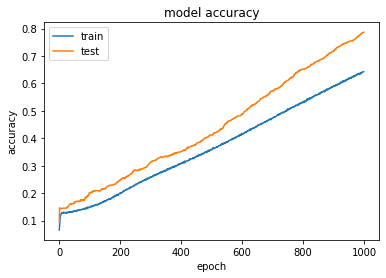

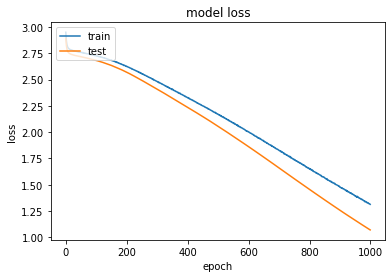

In [14]:
plt.plot(train_fit_data.history['acc'])
plt.plot(train_fit_data.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(train_fit_data.history['loss'])
plt.plot(train_fit_data.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
model.save('pokemon_so_deep/pokemon_cnn.h5')